In [1]:
'''
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not  
'''

'\nUse decision trees to prepare a model on fraud data \ntreating those who have taxable_income <= 30000 as "Risky" and others are "Good"\n\nData Description :\n\nUndergrad : person is under graduated or not\nMarital.Status : marital status of a person\nTaxable.Income : Taxable income is the amount of how much tax an individual owes to the government \nWork Experience : Work experience of an individual person\nUrban : Whether that person belongs to urban area or not  \n'

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

08/09/2023  01:40 AM           391,960  Naive Bayes_Salary.ipynb
08/10/2023  01:32 AM    <DIR>          .
08/02/2023  05:51 PM    <DIR>          ..
08/10/2023  12:58 AM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
08/02/2023  02:05 PM            30,582 Afinn.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
08/01/2023  03:25 PM           164,575 apriori algorithm_Book.ipynb
08/01/2023  03:29 PM           182,205 apriori algorithm-my_movies.ipynb
08/02/2023  10:55 AM               247 Assignment.txt
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stat

In [4]:
data= pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.shape

(600, 6)

In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
data['Taxable.Income'].min()

10003

In [10]:
data['Taxable.Income'].max()

99619

In [11]:
#Converting target variable in categorical variable
data['Taxable.Income'] = np.where(data['Taxable.Income']<=30000,'Risky','Good')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [12]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']=label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']=label_encoder.fit_transform(data['Marital.Status'])
data['Urban']=label_encoder.fit_transform(data['Urban'])


In [14]:
data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [15]:
data['Taxable.Income']=label_encoder.fit_transform(data['Taxable.Income'])

In [16]:
data['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [17]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


#### Model Building

In [18]:
X=data.drop(['Taxable.Income'], axis =1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [19]:
Y=data['Taxable.Income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [20]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, Y,random_state=20,test_size=0.3)

In [21]:
X_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
325,0,2,25779,16,1
553,0,2,26884,13,1
582,1,1,32907,12,1
488,1,2,76718,10,1
496,1,0,59382,5,1
...,...,...,...,...,...
218,0,1,38091,19,0
223,1,1,192297,17,1
271,0,2,183682,20,0
474,1,0,80729,0,0


### DecisionTreeClassifier

#### Entropy

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
treemodel=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [24]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<Figure size 1500x1000 with 0 Axes>

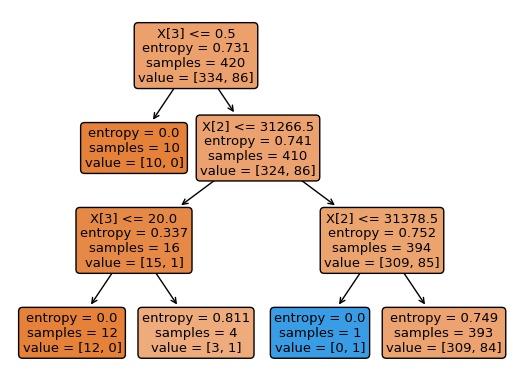

<Figure size 1500x1000 with 0 Axes>

In [25]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

plot_tree(treemodel,rounded = True,filled = True)

plt.figure(figsize=(15,10))

In [26]:
#prediction
y_pred=treemodel.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score,classification_report

In [29]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7888888888888889


In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       180
           1       0.00      0.00      0.00         0

    accuracy                           0.79       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.79      0.88       180



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### CART using Gini

In [31]:
treemodel=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [32]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
#prediction
y_pred=treemodel.predict(X_test)
np.mean(y_pred==y_test)

0.7611111111111111

In [34]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [35]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7611111111111111


In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       171
           1       0.05      0.22      0.09         9

    accuracy                           0.76       180
   macro avg       0.50      0.51      0.47       180
weighted avg       0.91      0.76      0.82       180



#### Using Pre prunning

In [37]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [38]:
from sklearn.model_selection import GridSearchCV


In [39]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [40]:
cv.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, Fi

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [42]:
y_test

493    1
172    1
352    1
506    1
595    0
      ..
508    0
476    0
475    0
235    0
89     1
Name: Taxable.Income, Length: 180, dtype: int32

In [43]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [44]:
y_pred=cv.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

In [46]:
score=accuracy_score(y_pred,y_test)

In [47]:
score

0.7833333333333333

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       179
           1       0.00      0.00      0.00         1

    accuracy                           0.78       180
   macro avg       0.50      0.39      0.44       180
weighted avg       0.99      0.78      0.87       180

